### Часть 3: выбор и исследование стратегии выбора числа кластеров.
Реализовано две стратегии:<br>
1) *Стратегия минимальных и максимальных значений*:<br>
Для каждого k в диапазоне от [2, [∛n] + 1] запускается функция KMeans, которая также возвращает массивы с координатами центров кластеров. Каждый раз подсчитывается минимальное внешнекластерное (exter_min) и максимальное внутрикластерное (inter_max) расстояния. Проверяется, начиная с какого значения k изменение отношения exter_min и inter_max становится достаточно малым, и выбирается значение перед ним.<br>
2) *Стратегия среднего внутреннего значения*:<br>
Всё как в первом пункте, но вместо отношения exter_min и inter_max берется среднее внутрикластерное значение.<br><br>

In [1]:
from mylib import *

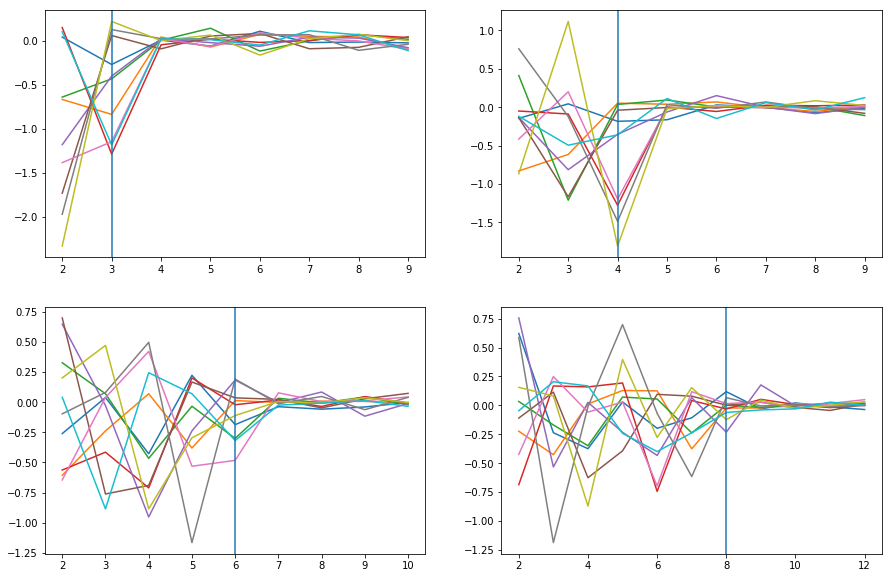

In [2]:
tests = ((800, 3), (950, 4), (1200, 6), (1999, 8))
rows, cols = 2, 2
pylab.figure(0, figsize = (15, 10))
for i in range(len(tests)):
    pylab.subplot(rows, cols, i + 1)
    show_best_K(k = tests[i][1], n = tests[i][0], n_tests = 10)

На картинках выше изображены отношения минимального внешнекластерного и максимального внутрикластерного растояний. Вертикальной линией отмечено действительное количество кластеров, которое было задано для make_blobs. Как видно, графики сильно колеблются до какого-то момента, и, начиная с определенного значения, их изменение становится достаточно малым. Чаще всего этим значением (или значением на единицу меньше) оказывается "правильное" k.

KeyboardInterrupt: 

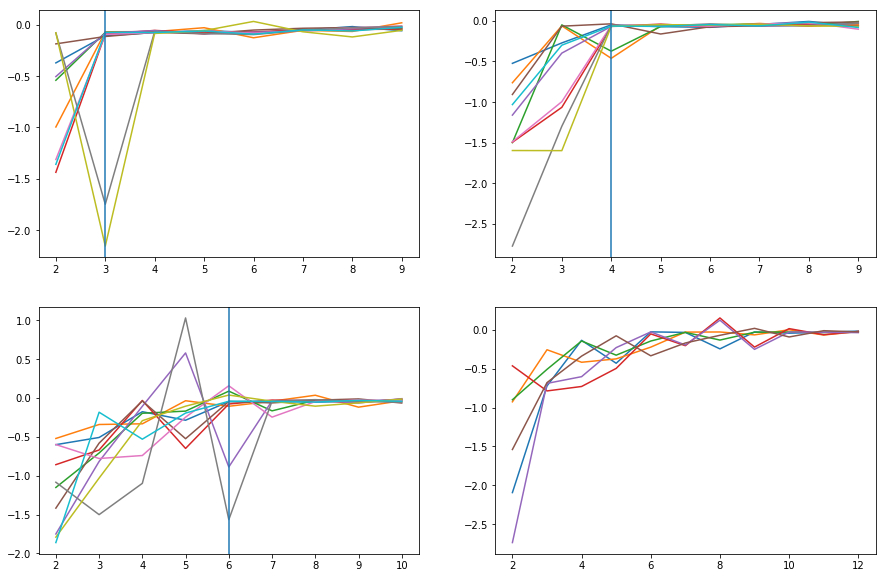

In [3]:
pylab.figure(0, figsize = (15, 10))
for i in range(len(tests)):
    pylab.subplot(rows, cols, i + 1)
    show_best_K(k = tests[i][1], n = tests[i][0], n_tests = 10, strat = True)

То же самое происходит и с графиками средних внутрикластерных расстояний. Поэтому было решено для нахождения "подходящего" количества кластеров выбрать некоторе число eps, в пределах которого может колебаться значение выбранной величины (отнешений минимальных и максимальных значений в первом варианте и среднее значение во втором) после прохождения через k, которое мы предполагаем верным. <br>
Чтобы выбрать это число, было проведено некоторое количество испытаний. На графиках ниже изображены результаты